In [1]:
import pandas
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')

In [3]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [4]:
x.head()

,account_check_status,duration_in_month,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,age,other_installment_plans,...,job,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,rango_plazos_credito_2,rango_edad_2
0,1,6,5,1,1,4,1,1,67,3,...,3,1,1,0,1,5,1,2,1,5
1,2,48,3,5,3,2,1,1,22,3,...,3,0,1,1,0,1,4,6,4,1
2,4,12,5,5,2,2,1,1,49,3,...,2,0,1,0,1,3,1,3,1,3
3,1,42,3,5,2,2,3,2,45,3,...,3,0,1,0,1,3,4,8,4,3
4,1,24,4,5,3,3,1,4,53,3,...,3,0,1,0,1,4,2,5,2,4


In [5]:

normalizer = StandardScaler()
x_normalized = normalizer.fit_transform(x)

In [6]:
x_normalized

array([[-1.06271653, -1.28600333,  1.50687935, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691,  2.07102202, -0.33157912, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232, -0.80642828,  1.50687935, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -0.80642828, -2.17003758, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691,  0.15272182, -0.33157912, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.80642828, -0.33157912, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [8]:
mediana = np.median(x_train)
mediana

-0.05094406520546483

In [9]:
x_train_binarizado = np.where(x_train > mediana, 1, 0)
x_train_binarizado

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [10]:
#entrenando el modelo
bnb = BernoulliNB()
bnb.fit(x_train_binarizado, y_train)

BernoulliNB()

In [11]:
#Binarizando la base de prueba
X_test_binarizado = np.where(x_test > np.median(x_test), 1, 0)
X_test_binarizado

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
predictions = bnb.predict(X_test_binarizado)
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

## Evaluamos el modelo

### Matriz de confusión

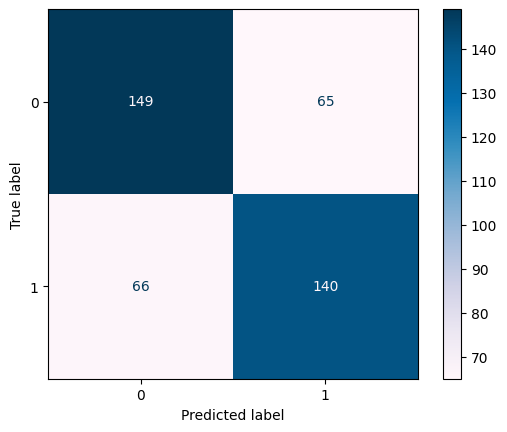

In [13]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [14]:
confmatrix

array([[149,  65],
       [ 66, 140]], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [16]:
model_scores = {
  'model': 'Naive_Bayes(Bernulli_NB)',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc
}
model_scores

{'model': 'Naive_Bayes(Bernulli_NB)',
 'accuracy': 0.6880952380952381,
 'precision': 0.6829268292682927,
 'recall': 0.6796116504854369,
 'f1_score': 0.6812652068126521,
 'roc_auc_score': 0.6879366663642138}

In [17]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [18]:
save_scores(model_scores)

['El archivo existe',
 'El modelo no existe',
 'Se añadió modelo nuevo y sus valores',
 'Se sobrescrive el archivo scores.csv con valores nuevos']